In [96]:
### Stock Market Prediction And Forecasting Using Stacked LSTM

In [97]:
import pandas as pd

In [98]:
df=pd.read_csv('Price_Dow.csv')

In [99]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/20/2017,20851,20901.0,20824.0,20868.0,20868.0,104838.0
1,3/21/2017,20855,20917.0,20603.0,20627.0,20627.0,266691.0
2,3/22/2017,20600,20633.0,20525.0,20596.0,20596.0,208619.0
3,3/23/2017,20589,20702.0,20561.0,20588.0,20588.0,187184.0
4,3/24/2017,20599,20674.0,20476.0,20575.0,20575.0,180188.0


In [100]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1518,3/27/2023,32486,32770.0,32418.0,32631.0,32631.0,136405.0
1519,3/28/2023,32667,32784.0,32486.0,32588.0,32588.0,120167.0
1520,3/29/2023,32622,32924.0,32616.0,32903.0,32903.0,135013.0
1521,3/30/2023,32894,33123.0,32863.0,33044.0,33044.0,135013.0
1522,3/31/2023,33327,NaN,NaN,NaN,NaN,NaN


In [101]:
df.shape

(1523, 7)

In [102]:
df1=df.reset_index()['Open']

In [103]:
df1

0       20851
1       20855
2       20600
3       20589
4       20599
        ...  
1518    32486
1519    32667
1520    32622
1521    32894
1522    33327
Name: Open, Length: 1523, dtype: int64

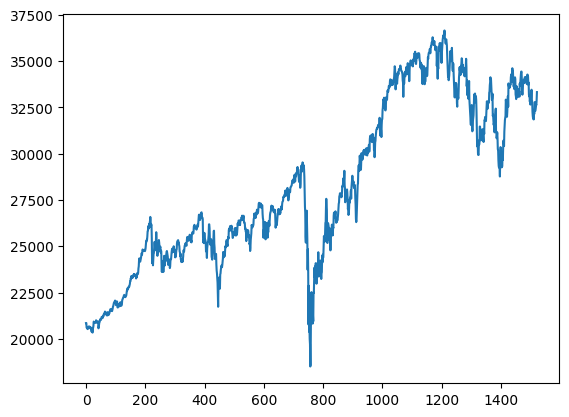

In [104]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [105]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [106]:
import numpy as np

In [107]:
df1

0       20851
1       20855
2       20600
3       20589
4       20599
        ...  
1518    32486
1519    32667
1520    32622
1521    32894
1522    33327
Name: Open, Length: 1523, dtype: int64

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [109]:
df1

array([[0.12929705],
       [0.12951741],
       [0.11546937],
       ...,
       [0.77776554],
       [0.79275011],
       [0.81660423]])

In [110]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [111]:
training_size,test_size

(989, 534)

In [112]:
train_data

array([[0.12929705],
       [0.12951741],
       [0.11546937],
       [0.11486338],
       [0.11541428],
       [0.11144777],
       [0.11133759],
       [0.11739753],
       [0.1153041 ],
       [0.11910533],
       [0.11541428],
       [0.11436756],
       [0.11866461],
       [0.11387175],
       [0.11657118],
       [0.11596518],
       [0.11579991],
       [0.11524901],
       [0.10985015],
       [0.10334949],
       [0.11337594],
       [0.10577347],
       [0.10087043],
       [0.11161305],
       [0.11541428],
       [0.12075804],
       [0.13364918],
       [0.13199647],
       [0.13177611],
       [0.13166593],
       [0.13039885],
       [0.1295725 ],
       [0.13045394],
       [0.13067431],
       [0.1375606 ],
       [0.13436536],
       [0.13150066],
       [0.1312803 ],
       [0.13050903],
       [0.1295725 ],
       [0.13420009],
       [0.13397973],
       [0.1135963 ],
       [0.11767298],
       [0.12582636],
       [0.13133539],
       [0.13238211],
       [0.137

In [113]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [114]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [115]:
print(X_train.shape), print(y_train.shape)

(888, 100)
(888,)


(None, None)

In [116]:
print(X_test.shape), print(ytest.shape)

(433, 100)
(433,)


(None, None)

In [117]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [118]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [119]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 15s 490ms/step - loss: 0.0429 - val_loss: 0.0992
Epoch 2/100
14/14 [==============================] - 3s 204ms/step - loss: 0.0083 - val_loss: 0.0191
Epoch 3/100
14/14 [==============================] - 4s 292ms/step - loss: 0.0044 - val_loss: 0.0247
Epoch 4/100
14/14 [==============================] - 3s 219ms/step - loss: 0.0037 - val_loss: 0.0207
Epoch 5/100
14/14 [==============================] - 4s 284ms/step - loss: 0.0033 - val_loss: 0.0113
Epoch 6/100
14/14 [==============================] - 4s 270ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 7/100
14/14 [==============================] - 3s 198ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 8/100
14/14 [==============================] - 4s 296ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 9/100
14/14 [==============================] - 4s 274ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 10/100
14/14 [==============================] - 4s 291ms/step - loss: 0.0025 - val_l

Epoch 80/100
14/14 [==============================] - 4s 293ms/step - loss: 5.2644e-04 - val_loss: 0.0020
Epoch 81/100
14/14 [==============================] - 4s 275ms/step - loss: 5.2461e-04 - val_loss: 0.0031
Epoch 82/100
14/14 [==============================] - 3s 243ms/step - loss: 5.3344e-04 - val_loss: 0.0013
Epoch 83/100
14/14 [==============================] - 4s 264ms/step - loss: 4.9987e-04 - val_loss: 0.0026
Epoch 84/100
14/14 [==============================] - 4s 285ms/step - loss: 4.9333e-04 - val_loss: 0.0023
Epoch 85/100
14/14 [==============================] - 4s 267ms/step - loss: 5.8597e-04 - val_loss: 0.0020
Epoch 86/100
14/14 [==============================] - 3s 247ms/step - loss: 5.5344e-04 - val_loss: 0.0051
Epoch 87/100
14/14 [==============================] - 4s 273ms/step - loss: 6.4068e-04 - val_loss: 0.0013
Epoch 88/100
14/14 [==============================] - 4s 324ms/step - loss: 4.7705e-04 - val_loss: 0.0032
Epoch 89/100
14/14 [==========================

In [123]:
import tensorflow as tf

In [124]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 [==============================] - 1s 57ms/step


In [125]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [126]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

26155.46620082367

In [127]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

34515.825417378546

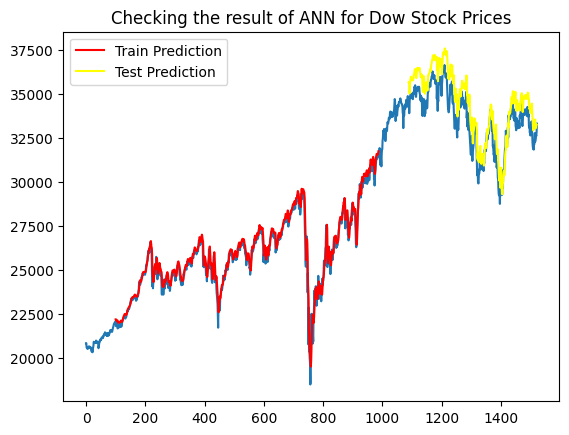

In [128]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot, color = "red", label = "Train Prediction")
plt.plot(testPredictPlot, color = "yellow", label = "Test Prediction")
plt.legend()
plt.title("Checking the result of ANN for Dow Stock Prices")
plt.show()

In [129]:
len(test_data)

534

In [130]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 193)

In [131]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [132]:
temp_input

[0.7139709122961657,
 0.6865359189070075,
 0.6895658880564126,
 0.6729836932569415,
 0.6912185985015427,
 0.6860951961216395,
 0.6913838695460557,
 0.7054319083296607,
 0.7062031732040548,
 0.6981599823710887,
 0.6866460996033497,
 0.6718818862935214,
 0.6681908329660644,
 0.7048259144997797,
 0.6919347730277656,
 0.7329770824151609,
 0.731985456148083,
 0.742507712648744,
 0.736447774349934,
 0.734684883208462,
 0.730387836051124,
 0.7514323490524462,
 0.7747355663287794,
 0.7890590568532394,
 0.7856985456148085,
 0.7666372851476422,
 0.7845967386513883,
 0.7814014984574704,
 0.7848171000440725,
 0.7907117672983695,
 0.7858087263111504,
 0.8150617011899517,
 0.8184222124283826,
 0.8375936535918909,
 0.8453613926840018,
 0.86067650947554,
 0.853349493168797,
 0.8538453063023359,
 0.8327457029528427,
 0.8042639929484356,
 0.7931357426178935,
 0.7961106214191276,
 0.8115910092551786,
 0.745702952842662,
 0.749283825473777,
 0.732040546496254,
 0.7189841339797269,
 0.7239973556632879,
 0.

In [133]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=192
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.68653592 0.68956589 0.67298369 0.6912186  0.6860952  0.69138387
 0.70543191 0.70620317 0.69815998 0.6866461  0.67188189 0.66819083
 0.70482591 0.69193477 0.73297708 0.73198546 0.74250771 0.73644777
 0.73468488 0.73038784 0.75143235 0.77473557 0.78905906 0.78569855
 0.76663729 0.78459674 0.7814015  0.7848171  0.79071177 0.78580873
 0.8150617  0.81842221 0.83759365 0.84536139 0.86067651 0.85334949
 0.85384531 0.8327457  0.80426399 0.79313574 0.79611062 0.81159101
 0.74570295 0.74928383 0.73204055 0.71898413 0.72399736 0.70741516
 0.69683781 0.72003085 0.7328669  0.75506831 0.76740855 0.69716836
 0.69887616 0.67926399 0.68554429 0.69639709 0.67937417 0.64587924
 0.64521816 0.61376157 0.59690392 0.59200088 0.61976642 0.59277215
 0.56539224 0.61034597 0.65293081 0.65111283 0.63023358 0.59354341
 0.59266197 0.59563684 0.59541648 0.63833186 0.61447774 0.65166373
 0.67248788 0.66224108 0.65585059 0.69887616 0.71644998 0.73391362
 0.74079991 0.74586822 0.79418246 0.78586382 0.779

3 day output [[0.89119405]]
4 day input [0.6860952  0.69138387 0.70543191 0.70620317 0.69815998 0.6866461
 0.67188189 0.66819083 0.70482591 0.69193477 0.73297708 0.73198546
 0.74250771 0.73644777 0.73468488 0.73038784 0.75143235 0.77473557
 0.78905906 0.78569855 0.76663729 0.78459674 0.7814015  0.7848171
 0.79071177 0.78580873 0.8150617  0.81842221 0.83759365 0.84536139
 0.86067651 0.85334949 0.85384531 0.8327457  0.80426399 0.79313574
 0.79611062 0.81159101 0.74570295 0.74928383 0.73204055 0.71898413
 0.72399736 0.70741516 0.69683781 0.72003085 0.7328669  0.75506831
 0.76740855 0.69716836 0.69887616 0.67926399 0.68554429 0.69639709
 0.67937417 0.64587924 0.64521816 0.61376157 0.59690392 0.59200088
 0.61976642 0.59277215 0.56539224 0.61034597 0.65293081 0.65111283
 0.63023358 0.59354341 0.59266197 0.59563684 0.59541648 0.63833186
 0.61447774 0.65166373 0.67248788 0.66224108 0.65585059 0.69887616
 0.71644998 0.73391362 0.74079991 0.74586822 0.79418246 0.78586382
 0.7796937  0.75374614 0

9 day output [[0.9395141]]
10 day input [0.67188189 0.66819083 0.70482591 0.69193477 0.73297708 0.73198546
 0.74250771 0.73644777 0.73468488 0.73038784 0.75143235 0.77473557
 0.78905906 0.78569855 0.76663729 0.78459674 0.7814015  0.7848171
 0.79071177 0.78580873 0.8150617  0.81842221 0.83759365 0.84536139
 0.86067651 0.85334949 0.85384531 0.8327457  0.80426399 0.79313574
 0.79611062 0.81159101 0.74570295 0.74928383 0.73204055 0.71898413
 0.72399736 0.70741516 0.69683781 0.72003085 0.7328669  0.75506831
 0.76740855 0.69716836 0.69887616 0.67926399 0.68554429 0.69639709
 0.67937417 0.64587924 0.64521816 0.61376157 0.59690392 0.59200088
 0.61976642 0.59277215 0.56539224 0.61034597 0.65293081 0.65111283
 0.63023358 0.59354341 0.59266197 0.59563684 0.59541648 0.63833186
 0.61447774 0.65166373 0.67248788 0.66224108 0.65585059 0.69887616
 0.71644998 0.73391362 0.74079991 0.74586822 0.79418246 0.78586382
 0.7796937  0.75374614 0.74322389 0.75848391 0.78834288 0.8048149
 0.77297268 0.8424416  0

15 day output [[1.0368266]]
16 day input [0.74250771 0.73644777 0.73468488 0.73038784 0.75143235 0.77473557
 0.78905906 0.78569855 0.76663729 0.78459674 0.7814015  0.7848171
 0.79071177 0.78580873 0.8150617  0.81842221 0.83759365 0.84536139
 0.86067651 0.85334949 0.85384531 0.8327457  0.80426399 0.79313574
 0.79611062 0.81159101 0.74570295 0.74928383 0.73204055 0.71898413
 0.72399736 0.70741516 0.69683781 0.72003085 0.7328669  0.75506831
 0.76740855 0.69716836 0.69887616 0.67926399 0.68554429 0.69639709
 0.67937417 0.64587924 0.64521816 0.61376157 0.59690392 0.59200088
 0.61976642 0.59277215 0.56539224 0.61034597 0.65293081 0.65111283
 0.63023358 0.59354341 0.59266197 0.59563684 0.59541648 0.63833186
 0.61447774 0.65166373 0.67248788 0.66224108 0.65585059 0.69887616
 0.71644998 0.73391362 0.74079991 0.74586822 0.79418246 0.78586382
 0.7796937  0.75374614 0.74322389 0.75848391 0.78834288 0.8048149
 0.77297268 0.8424416  0.83412296 0.83318643 0.8299361  0.83577567
 0.83059718 0.84056853 

21 day output [[1.1362213]]
22 day input [0.78905906 0.78569855 0.76663729 0.78459674 0.7814015  0.7848171
 0.79071177 0.78580873 0.8150617  0.81842221 0.83759365 0.84536139
 0.86067651 0.85334949 0.85384531 0.8327457  0.80426399 0.79313574
 0.79611062 0.81159101 0.74570295 0.74928383 0.73204055 0.71898413
 0.72399736 0.70741516 0.69683781 0.72003085 0.7328669  0.75506831
 0.76740855 0.69716836 0.69887616 0.67926399 0.68554429 0.69639709
 0.67937417 0.64587924 0.64521816 0.61376157 0.59690392 0.59200088
 0.61976642 0.59277215 0.56539224 0.61034597 0.65293081 0.65111283
 0.63023358 0.59354341 0.59266197 0.59563684 0.59541648 0.63833186
 0.61447774 0.65166373 0.67248788 0.66224108 0.65585059 0.69887616
 0.71644998 0.73391362 0.74079991 0.74586822 0.79418246 0.78586382
 0.7796937  0.75374614 0.74322389 0.75848391 0.78834288 0.8048149
 0.77297268 0.8424416  0.83412296 0.83318643 0.8299361  0.83577567
 0.83059718 0.84056853 0.839026   0.86106214 0.86772807 0.87020714
 0.84662847 0.84629793 

27 day output [[1.2495556]]
28 day input [0.79071177 0.78580873 0.8150617  0.81842221 0.83759365 0.84536139
 0.86067651 0.85334949 0.85384531 0.8327457  0.80426399 0.79313574
 0.79611062 0.81159101 0.74570295 0.74928383 0.73204055 0.71898413
 0.72399736 0.70741516 0.69683781 0.72003085 0.7328669  0.75506831
 0.76740855 0.69716836 0.69887616 0.67926399 0.68554429 0.69639709
 0.67937417 0.64587924 0.64521816 0.61376157 0.59690392 0.59200088
 0.61976642 0.59277215 0.56539224 0.61034597 0.65293081 0.65111283
 0.63023358 0.59354341 0.59266197 0.59563684 0.59541648 0.63833186
 0.61447774 0.65166373 0.67248788 0.66224108 0.65585059 0.69887616
 0.71644998 0.73391362 0.74079991 0.74586822 0.79418246 0.78586382
 0.7796937  0.75374614 0.74322389 0.75848391 0.78834288 0.8048149
 0.77297268 0.8424416  0.83412296 0.83318643 0.8299361  0.83577567
 0.83059718 0.84056853 0.839026   0.86106214 0.86772807 0.87020714
 0.84662847 0.84629793 0.88761569 0.87588145 0.87791979 0.85406567
 0.83373733 0.83280079

In [134]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [135]:
import matplotlib.pyplot as plt

In [136]:
len(df1)

1523

In [137]:
 scaler.inverse_transform(lst_output)

array([[33755.92074251],
       [34132.51390266],
       [34445.8166132 ],
       [34680.95431471],
       [34848.99096155],
       [34973.27597666],
       [35082.69833374],
       [35204.62471199],
       [35359.5265646 ],
       [35558.05995321],
       [35800.83401203],
       [36080.32382393],
       [36384.28719807],
       [36699.54606247],
       [37015.17278767],
       [37324.47663498],
       [37625.51659775],
       [37920.32456589],
       [38213.3862772 ],
       [38509.85611057],
       [38814.07915115],
       [39128.68884945],
       [39454.29325771],
       [39789.81908798],
       [40133.11110878],
       [40481.64839172],
       [40833.15236378],
       [41185.93302917],
       [41538.96470547],
       [41891.77999306]])

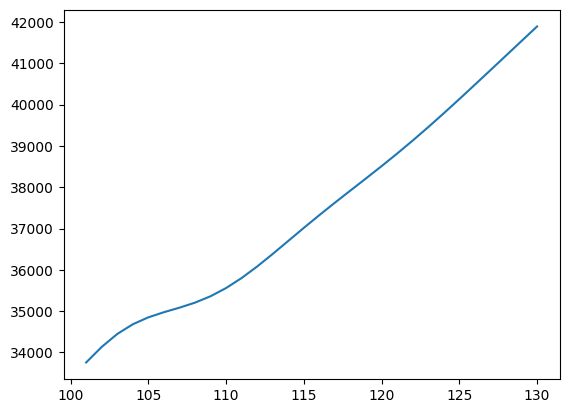

In [138]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [139]:
df1

array([[0.12929705],
       [0.12951741],
       [0.11546937],
       ...,
       [0.77776554],
       [0.79275011],
       [0.81660423]])

In [140]:
scaler.inverse_transform(lst_output)

array([[33755.92074251],
       [34132.51390266],
       [34445.8166132 ],
       [34680.95431471],
       [34848.99096155],
       [34973.27597666],
       [35082.69833374],
       [35204.62471199],
       [35359.5265646 ],
       [35558.05995321],
       [35800.83401203],
       [36080.32382393],
       [36384.28719807],
       [36699.54606247],
       [37015.17278767],
       [37324.47663498],
       [37625.51659775],
       [37920.32456589],
       [38213.3862772 ],
       [38509.85611057],
       [38814.07915115],
       [39128.68884945],
       [39454.29325771],
       [39789.81908798],
       [40133.11110878],
       [40481.64839172],
       [40833.15236378],
       [41185.93302917],
       [41538.96470547],
       [41891.77999306]])

In [141]:
df1 = scaler.inverse_transform(df1[1158:])
lst_output = scaler.inverse_transform(lst_output)

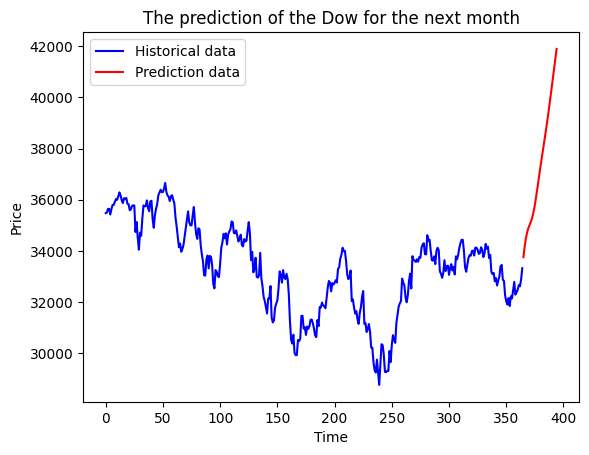

In [142]:
# plot df1
plt.plot(df1, color='blue', label='Historical data')

# plot lst_output starting at the end of df1
plt.plot(range(len(df1), len(df1) + len(lst_output)), lst_output, color='red', label='Prediction data')

# add legend and labels
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("The prediction of the Dow for the next month")

# show the plot
plt.show()